In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

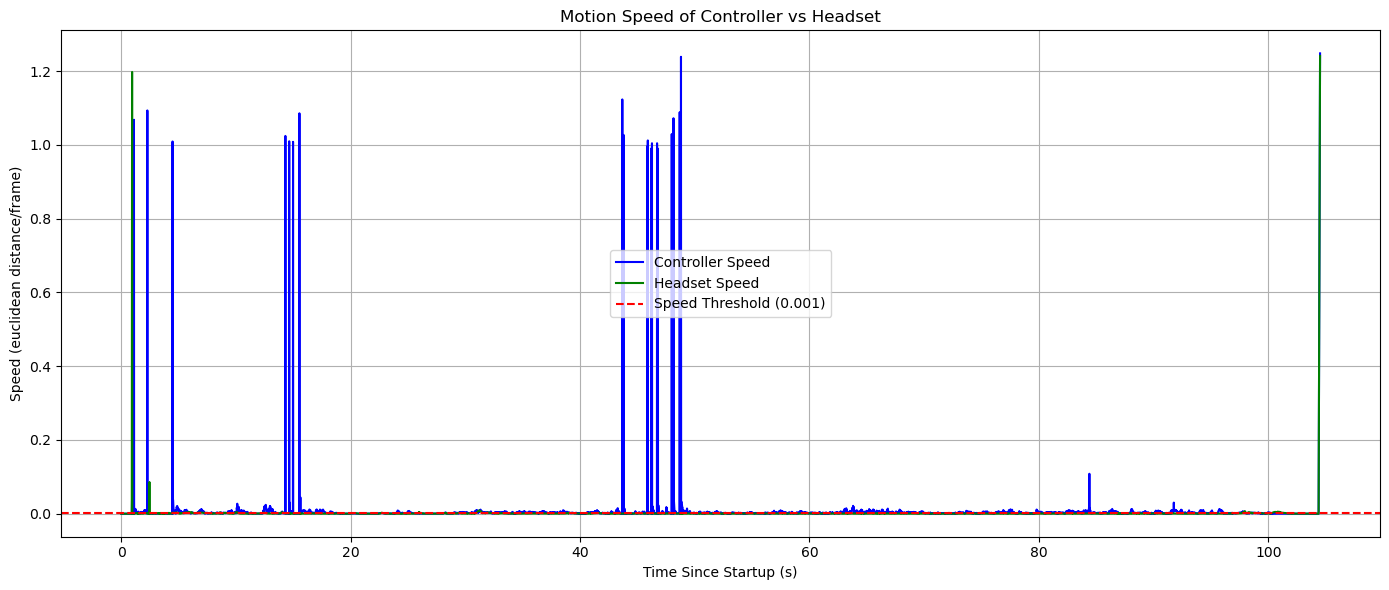

In [1]:
df = pd.read_csv("RightControllerData_20250702_113850.csv")

# --------- Controller Speed ----------
df["ctrl_dx"] = df["ControllerPosX"].diff()
df["ctrl_dy"] = df["ControllerPosY"].diff()
df["ctrl_dz"] = df["ControllerPosZ"].diff()
df["controller_speed"] = np.sqrt(df["ctrl_dx"]**2 + df["ctrl_dy"]**2 + df["ctrl_dz"]**2)

# --------- Headset Speed ----------
df["head_dx"] = df["HeadsetPosX"].diff()
df["head_dy"] = df["HeadsetPosY"].diff()
df["head_dz"] = df["HeadsetPosZ"].diff()
df["headset_speed"] = np.sqrt(df["head_dx"]**2 + df["head_dy"]**2 + df["head_dz"]**2)

# --------- Plot ----------
plt.figure(figsize=(14, 6))
plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Controller Speed", color='blue')
plt.plot(df["TimeSinceStartup"], df["headset_speed"], label="Headset Speed", color='green')
plt.axhline(0.001, color='red', linestyle='--', label='Speed Threshold (0.001)')
plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance/frame)")
plt.title("Motion Speed of Controller vs Headset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
df

,FrameNumber,TimeSinceStartup,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,...,ControllerRotZ,ControllerRotW,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed
0,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.02000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
2,3,0.13519,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
3,4,0.16334,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
4,5,0.17036,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,7281,104.34190,-0.07822,1.20937,0.26746,0.11260,0.02382,0.01080,0.99330,-0.06159,...,-0.06714,-0.92573,0.00000,0.0000,0.00000,0.000000,-0.00001,-0.00005,0.00003,0.000059
7281,7282,104.35650,-0.07821,1.20931,0.26748,0.11274,0.02381,0.01095,0.99328,-0.06159,...,-0.06714,-0.92573,0.00000,0.0000,0.00000,0.000000,0.00001,-0.00006,0.00002,0.000064
7282,7283,104.37010,-0.07819,1.20924,0.26749,0.11317,0.02372,0.01143,0.99323,-0.06159,...,-0.06714,-0.92573,0.00000,0.0000,0.00000,0.000000,0.00002,-0.00007,0.00001,0.000073
7283,7284,104.38300,-0.07818,1.20919,0.26749,0.11327,0.02381,0.01133,0.99321,-0.06159,...,-0.06714,-0.92573,0.00000,0.0000,0.00000,0.000000,0.00001,-0.00005,0.00000,0.000051


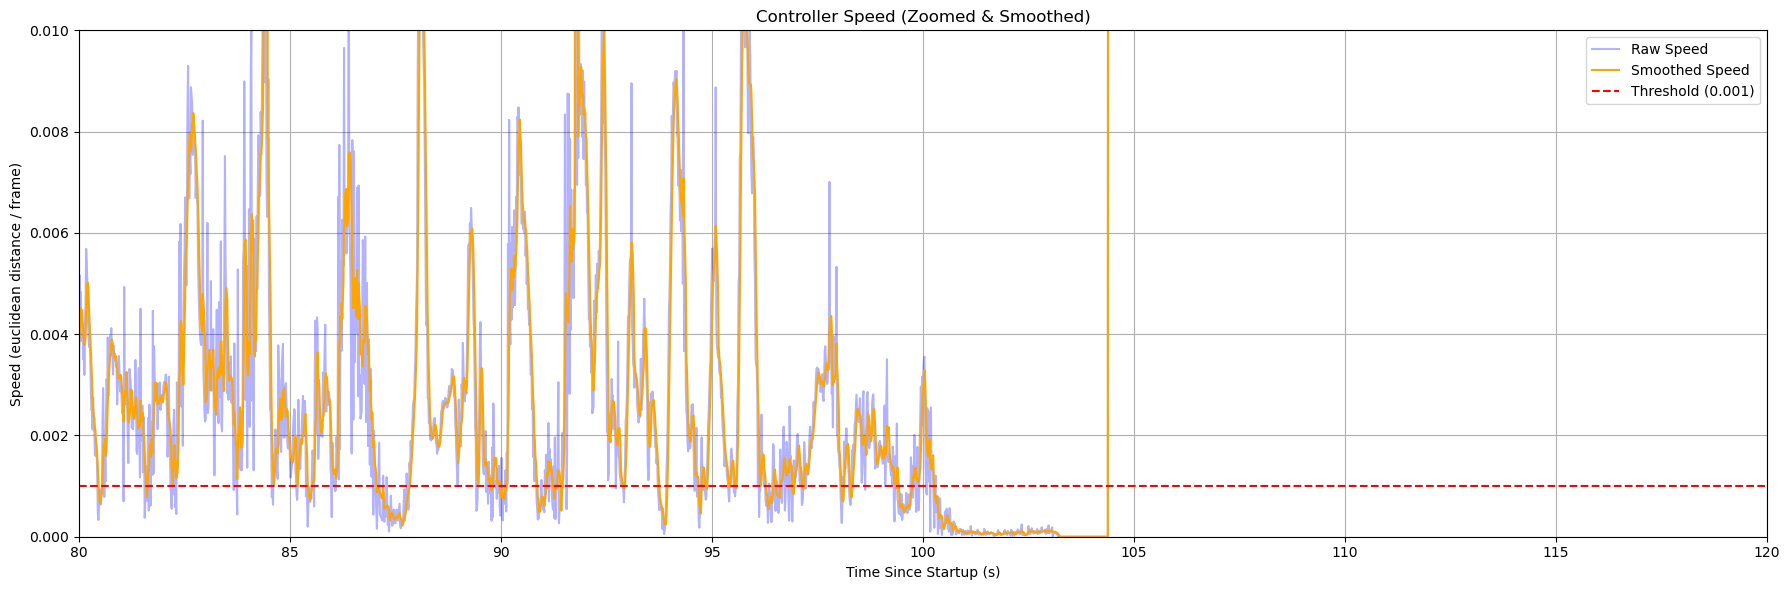

In [5]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

# Threshold
plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(80, 120)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

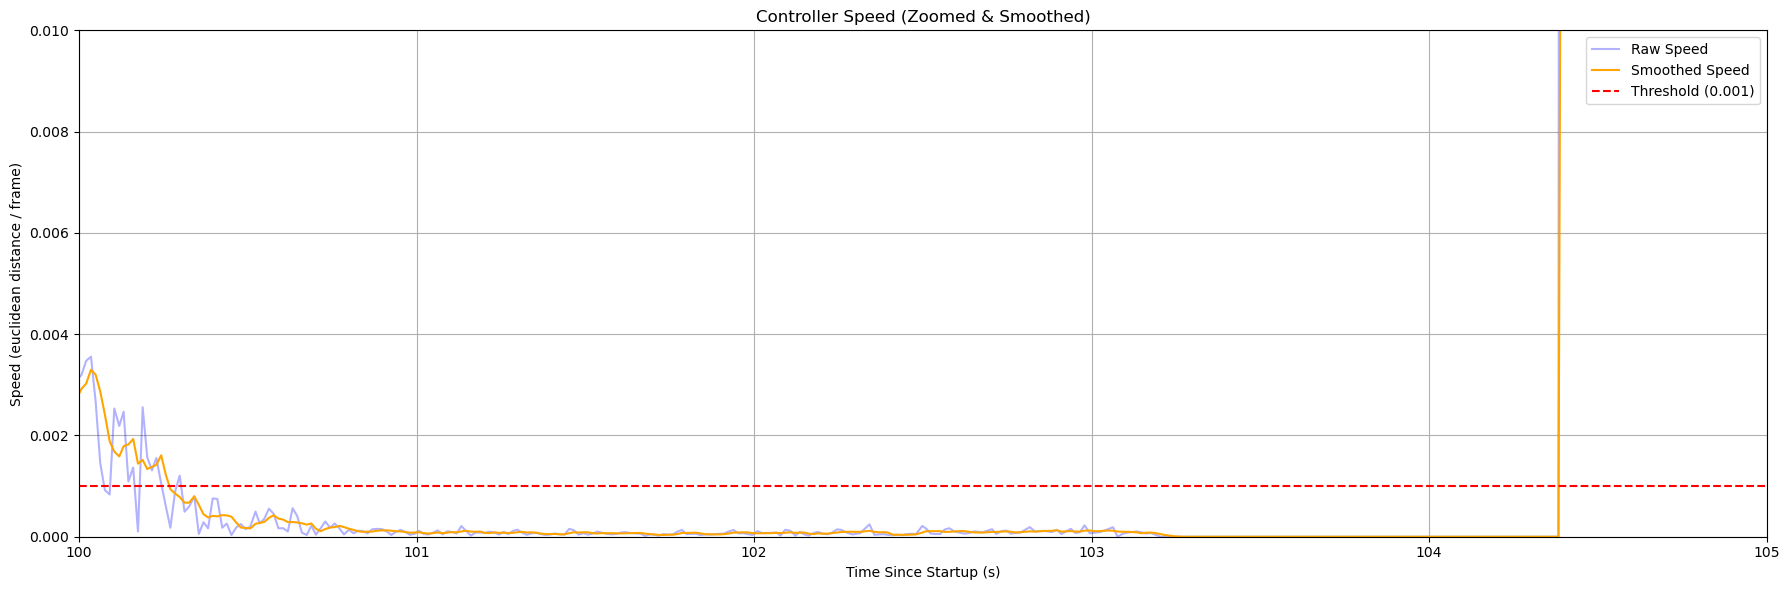

In [6]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(100, 105)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

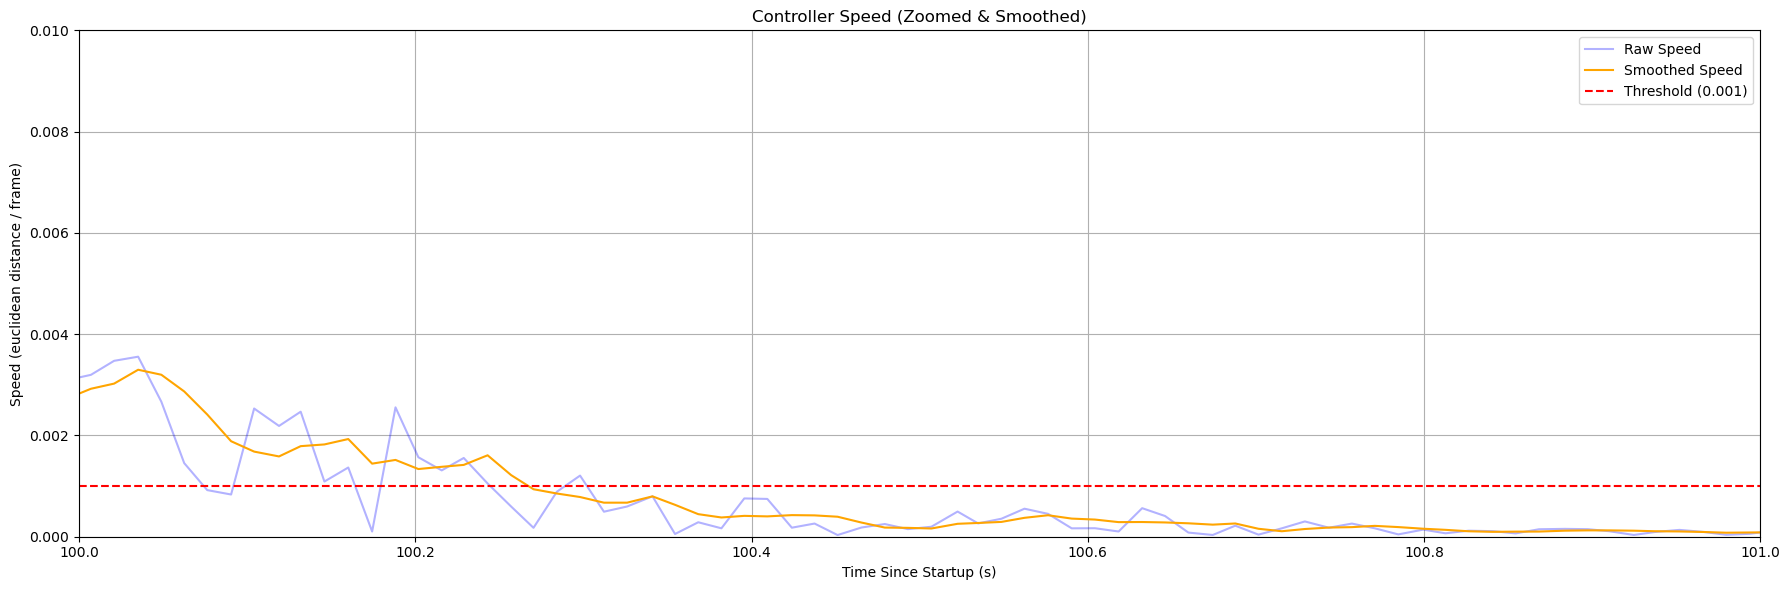

In [9]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

# Threshold
plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(100, 101)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
offset_sec = 22.1
df['time_sec_aligned'] = df['TimeSinceStartup'] - offset_sec

print(df[['TimeSinceStartup', 'time_sec_aligned']].head())

   TimeSinceStartup  time_sec_aligned
0           0.00000         -22.10000
1           0.02000         -22.08000
2           0.13519         -21.96481
3           0.16334         -21.93666
4           0.17036         -21.92964


In [11]:
df

,FrameNumber,TimeSinceStartup,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,...,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned
0,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.10000
1,2,0.02000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-22.08000
2,3,0.13519,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.96481
3,4,0.16334,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.93666
4,5,0.17036,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.92964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,7281,104.34190,-0.07822,1.20937,0.26746,0.11260,0.02382,0.01080,0.99330,-0.06159,...,0.00000,0.0000,0.00000,0.000000,-0.00001,-0.00005,0.00003,0.000059,0.00000,82.24190
7281,7282,104.35650,-0.07821,1.20931,0.26748,0.11274,0.02381,0.01095,0.99328,-0.06159,...,0.00000,0.0000,0.00000,0.000000,0.00001,-0.00006,0.00002,0.000064,0.00000,82.25650
7282,7283,104.37010,-0.07819,1.20924,0.26749,0.11317,0.02372,0.01143,0.99323,-0.06159,...,0.00000,0.0000,0.00000,0.000000,0.00002,-0.00007,0.00001,0.000073,0.00000,82.27010
7283,7284,104.38300,-0.07818,1.20919,0.26749,0.11327,0.02381,0.01133,0.99321,-0.06159,...,0.00000,0.0000,0.00000,0.000000,0.00001,-0.00005,0.00000,0.000051,0.00000,82.28300


In [12]:
df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].isna().sum()

ControllerPosX    0
ControllerPosY    0
ControllerPosZ    0
dtype: int64

In [13]:
print("Missing values:")
print(df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].isna().sum())

print("\nZero values:")
print((df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']] == 0).sum())

diff = df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].diff()

diff['jump'] = np.sqrt(diff['ControllerPosX']**2 + diff['ControllerPosY']**2 + diff['ControllerPosZ']**2)

threshold = 1.0
outlier_frames = df.loc[diff['jump'] > threshold]

print(f"\nNumber of frames with jump > {threshold} m: {len(outlier_frames)}")

print("\nExample potential outliers:")
print(outlier_frames[['FrameNumber', 'ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].head())

Missing values:
ControllerPosX    0
ControllerPosY    0
ControllerPosZ    0
dtype: int64

Zero values:
ControllerPosX    328
ControllerPosY     60
ControllerPosZ     60
dtype: int64

Number of frames with jump > 1.0 m: 17

Example potential outliers:
      FrameNumber  ControllerPosX  ControllerPosY  ControllerPosZ
70             71         0.30161         1.00476         0.03787
154           155         0.00000        -0.01964         0.04598
312           313         0.04203         0.96457         0.26433
1016         1017         0.00000        -0.01964         0.04598
1040         1041         0.07816         0.88033         0.49683


In [14]:
if 'time_sec_offset' in df.columns:
    df= df.drop(columns=['time_sec_offset'])

time_sec_offset = df['TimeSinceStartup'] - 20.1

time_idx = df.columns.get_loc('TimeSinceStartup')

df.insert(time_idx + 1, 'time_sec_offset', time_sec_offset)

df

,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned
0,1,0.00000,-20.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.10000
1,2,0.02000,-20.08000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-22.08000
2,3,0.13519,-19.96481,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.96481
3,4,0.16334,-19.93666,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.93666
4,5,0.17036,-19.92964,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.92964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,7281,104.34190,84.24190,-0.07822,1.20937,0.26746,0.11260,0.02382,0.01080,0.99330,...,0.00000,0.0000,0.00000,0.000000,-0.00001,-0.00005,0.00003,0.000059,0.00000,82.24190
7281,7282,104.35650,84.25650,-0.07821,1.20931,0.26748,0.11274,0.02381,0.01095,0.99328,...,0.00000,0.0000,0.00000,0.000000,0.00001,-0.00006,0.00002,0.000064,0.00000,82.25650
7282,7283,104.37010,84.27010,-0.07819,1.20924,0.26749,0.11317,0.02372,0.01143,0.99323,...,0.00000,0.0000,0.00000,0.000000,0.00002,-0.00007,0.00001,0.000073,0.00000,82.27010
7283,7284,104.38300,84.28300,-0.07818,1.20919,0.26749,0.11327,0.02381,0.01133,0.99321,...,0.00000,0.0000,0.00000,0.000000,0.00001,-0.00005,0.00000,0.000051,0.00000,82.28300


In [15]:
df2 = pd.read_csv("hand_lable_01-test-01.csv")

print("Shape:", df.shape)
df2

Shape: (7285, 27)


,Observation id,Observation date,Description,Observation duration,Observation type,Source,Time offset (s),Media duration (s),FPS,Subject,Behavior,Behavioral category,Behavior type,Time,Media file name,Image index,Image file path,Comment
0,01-2,2025-07-07 00:43:47.739,NaN,79.1,Media file(s),player #1:D:/Data Science/UOB/DS_project/Full ...,0.0,87.333,60.0,1,hold,NaN,START,0.000,D:/Data Science/UOB/DS_project/Full Study/01-2...,0,NaN,NaN
1,01-2,2025-07-07 00:43:47.739,NaN,79.1,Media file(s),player #1:D:/Data Science/UOB/DS_project/Full ...,0.0,87.333,60.0,1,hold,NaN,STOP,10.750,D:/Data Science/UOB/DS_project/Full Study/01-2...,645,NaN,NaN
2,01-2,2025-07-07 00:43:47.739,NaN,79.1,Media file(s),player #1:D:/Data Science/UOB/DS_project/Full ...,0.0,87.333,60.0,1,adjust,NaN,START,10.767,D:/Data Science/UOB/DS_project/Full Study/01-2...,646,NaN,NaN
3,01-2,2025-07-07 00:43:47.739,NaN,79.1,Media file(s),player #1:D:/Data Science/UOB/DS_project/Full ...,0.0,87.333,60.0,1,adjust,NaN,STOP,11.467,D:/Data Science/UOB/DS_project/Full Study/01-2...,688,NaN,NaN
4,01-2,2025-07-07 00:43:47.739,NaN,79.1,Media file(s),player #1:D:/Data Science/UOB/DS_project/Full ...,0.0,87.333,60.0,1,hold,NaN,START,11.483,D:/Data Science/UOB/DS_project/Full Study/01-2...,689,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,01-2,2025-07-07 00:43:47.739,NaN,79.1,Media file(s),player #1:D:/Data Science/UOB/DS_project/Full ...,0.0,87.333,60.0,1,hold,NaN,STOP,74.850,D:/Data Science/UOB/DS_project/Full Study/01-2...,4491,NaN,NaN
74,01-2,2025-07-07 00:43:47.739,NaN,79.1,Media file(s),player #1:D:/Data Science/UOB/DS_project/Full ...,0.0,87.333,60.0,1,place,NaN,START,74.867,D:/Data Science/UOB/DS_project/Full Study/01-2...,4492,NaN,NaN
75,01-2,2025-07-07 00:43:47.739,NaN,79.1,Media file(s),player #1:D:/Data Science/UOB/DS_project/Full ...,0.0,87.333,60.0,1,place,NaN,STOP,78.700,D:/Data Science/UOB/DS_project/Full Study/01-2...,4722,NaN,NaN
76,01-2,2025-07-07 00:43:47.739,NaN,79.1,Media file(s),player #1:D:/Data Science/UOB/DS_project/Full ...,0.0,87.333,60.0,1,other,NaN,START,78.717,D:/Data Science/UOB/DS_project/Full Study/01-2...,4723,NaN,NaN


In [16]:
df_sub = df2[['Behavior', 'Behavior type', 'Time', 'Image index']]

df_start = df_sub[df_sub['Behavior type'] == 'START'].copy()
df_stop  = df_sub[df_sub['Behavior type'] == 'STOP'].copy()

df_start = df_start.reset_index(drop=True)
df_stop  = df_stop.reset_index(drop=True)

df_events = pd.DataFrame({
    'behavior': df_start['Behavior'],
    'start_time': df_start['Time'],
    'stop_time': df_stop['Time'],
    'start_image_index': df_start['Image index'],
    'stop_image_index': df_stop['Image index']
})

df_events

,behavior,start_time,stop_time,start_image_index,stop_image_index
0,hold,0.000,10.750,0,645
1,adjust,10.767,11.467,646,688
2,hold,11.483,12.217,689,733
3,press,12.233,12.750,734,765
4,hold,12.767,13.417,766,805
5,hold,17.700,17.850,1062,1071
6,press,17.867,19.117,1072,1147
7,hold,19.133,20.233,1148,1214
8,press,20.250,21.333,1215,1280
9,hold,21.350,21.617,1281,1297


In [17]:
df['behavior'] = np.nan

for _, row in df_events.iterrows():
    b = row['behavior']
    t_start = row['start_time']
    t_stop = row['stop_time']

    mask = (df['time_sec_offset'] >= t_start) & (df['time_sec_offset'] <= t_stop)

    df.loc[mask, 'behavior'] = b

df

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_26913/3175346181.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'hold' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'behavior'] = b


,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned,behavior
0,1,0.00000,-20.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.10000,NaN
1,2,0.02000,-20.08000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-22.08000,NaN
2,3,0.13519,-19.96481,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.96481,NaN
3,4,0.16334,-19.93666,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.93666,NaN
4,5,0.17036,-19.92964,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.92964,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,7281,104.34190,84.24190,-0.07822,1.20937,0.26746,0.11260,0.02382,0.01080,0.99330,...,0.0000,0.00000,0.000000,-0.00001,-0.00005,0.00003,0.000059,0.00000,82.24190,NaN
7281,7282,104.35650,84.25650,-0.07821,1.20931,0.26748,0.11274,0.02381,0.01095,0.99328,...,0.0000,0.00000,0.000000,0.00001,-0.00006,0.00002,0.000064,0.00000,82.25650,NaN
7282,7283,104.37010,84.27010,-0.07819,1.20924,0.26749,0.11317,0.02372,0.01143,0.99323,...,0.0000,0.00000,0.000000,0.00002,-0.00007,0.00001,0.000073,0.00000,82.27010,NaN
7283,7284,104.38300,84.28300,-0.07818,1.20919,0.26749,0.11327,0.02381,0.01133,0.99321,...,0.0000,0.00000,0.000000,0.00001,-0.00005,0.00000,0.000051,0.00000,82.28300,NaN


In [18]:
print(df['behavior'].value_counts(dropna=False))

behavior
hold      2436
NaN       2134
press      874
adjust     797
rotate     745
place      272
other       27
Name: count, dtype: int64


In [29]:
df[(df['time_sec_offset'] <= 67.633)][['TimeSinceStartup', 'time_sec_offset', 'behavior']]

,TimeSinceStartup,time_sec_offset,behavior
0,0.00000,-20.10000,NaN
1,0.02000,-20.08000,NaN
2,0.13519,-19.96481,NaN
3,0.16334,-19.93666,NaN
4,0.17036,-19.92964,NaN
...,...,...,...
6106,87.65044,67.55044,hold
6107,87.66438,67.56438,hold
6108,87.67916,67.57916,hold
6109,87.70586,67.60586,NaN


In [27]:
df.to_csv("controller_with_aligned_time_01-test-01.csv", index=False)